1. Загрузите файл HR.csv в pandas dataframe

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats 

In [188]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
df.describe() #тут мы получаем среднее(mean) ,медиана(quantil 50%), мин/макс, сред.отклонение(std)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
# считаем моды:
print("satisfaction_mode = " , df['satisfaction_level'].round(1).mode()[0])
print("evaluation_mode = ", df['last_evaluation'].round(1).mode()[0])
print("number_project_mode = ", df['number_project'].round().mode()[0])
print("average_montly_hours_mode = ", df['average_montly_hours'].round().mode()[0])
print("time_spend_company_mode = ", df['time_spend_company'].round().mode()[0])
print("Work_accident_mode = ", df['Work_accident'].round().mode()[0])
print("left_mode = ", df['left'].round().mode()[0])
print("promotion_mode = ", df['promotion_last_5years'].round().mode()[0])
print("department_mode = ", df['department'].mode()[0])
print("salary_mode = ", df['salary'].mode()[0])

satisfaction_mode =  0.8
evaluation_mode =  0.6
number_project_mode =  4
average_montly_hours_mode =  135
time_spend_company_mode =  3
Work_accident_mode =  0
left_mode =  0
promotion_mode =  0
department_mode =  sales
salary_mode =  low


3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [206]:
df_num = df.iloc[:, 0:5]

In [207]:
df_num.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [208]:
# две самые скоррелированные:
# 1. average_montly_hours & number_project: corr = 0.417211
# 2. number_project & last_evaluation: corr = 0.349333
# две наименее скоррелированные:
# 1. satisfaction_level & average_montly_hours: corr = -0.020048
# 2. satisfaction_level & time_spend_company: corr = -0.100866

<AxesSubplot:>

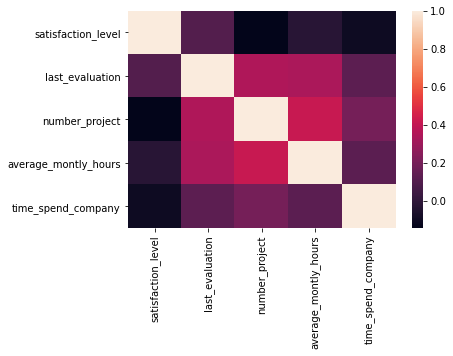

In [209]:
sns.heatmap(df_num.corr())

4. Рассчитайте, сколько сотрудников работает в каждом департаменте.

In [35]:
df_dep = df['department'].value_counts().reset_index()
df_dep.columns = ['department', 'count']
df_dep

,department,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


5. Покажите распределение сотрудников по зарплатам.

In [36]:
df_salary = df['salary'].value_counts().reset_index()
df_salary.columns = ['salary', 'count']
df_salary

,salary,count
0,low,7316
1,medium,6446
2,high,1237


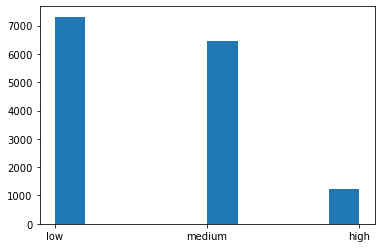

In [38]:
plt.hist(df['salary']);

6. Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [112]:
deps = set(df['department'])

technical
   salary  count
0     low   1372
1  medium   1147
2    high    201


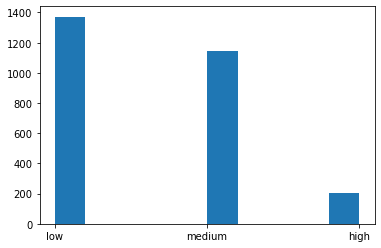

product_mng
   salary  count
0     low    451
1  medium    383
2    high     68


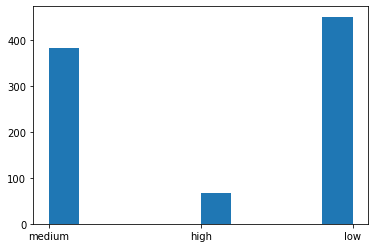

accounting
   salary  count
0     low    358
1  medium    335
2    high     74


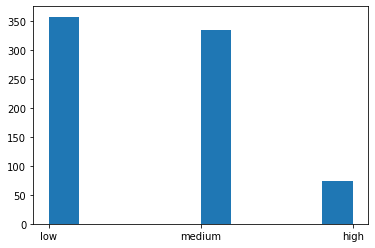

sales
   salary  count
0     low   2099
1  medium   1772
2    high    269


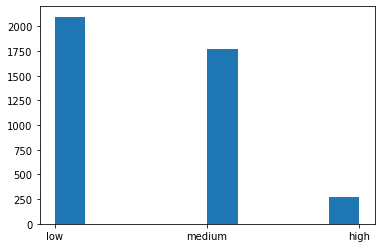

RandD
   salary  count
0  medium    372
1     low    364
2    high     51


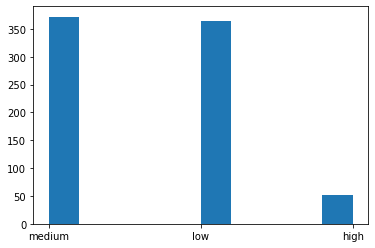

hr
   salary  count
0  medium    359
1     low    335
2    high     45


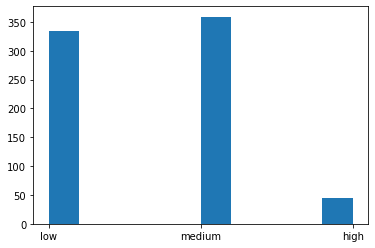

management
   salary  count
0  medium    225
1    high    225
2     low    180


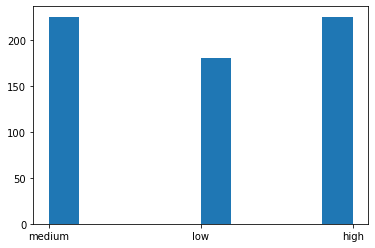

marketing
   salary  count
0     low    402
1  medium    376
2    high     80


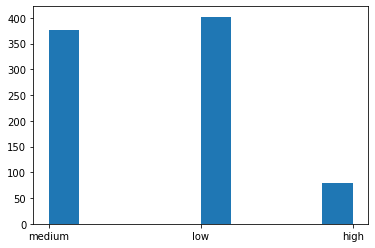

IT
   salary  count
0     low    609
1  medium    535
2    high     83


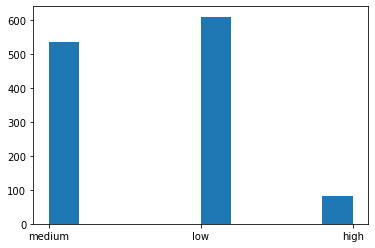

support
   salary  count
0     low   1146
1  medium    942
2    high    141


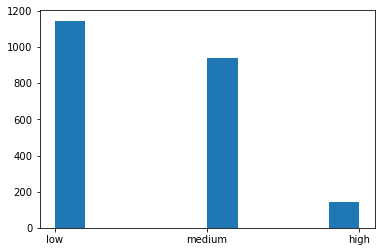

In [111]:
for dep in deps:
    df_dep = df.loc[df['department'] == dep]
    df_dep_salary = df_dep['salary'].value_counts().reset_index()
    df_dep_salary.columns = ['salary', 'count']
    print(dep)
    print(df_dep_salary)
    plt.hist(df_dep['salary'])
    plt.show()  

7. Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [ ]:
# H_0: сотрудники с высоким окладом проводят столько же времени как и  с низким

In [126]:
data_1 = df.loc[df['salary'] == 'high']['average_montly_hours']
data_2 = df.loc[df['salary'] != 'low']['average_montly_hours']
stat, p = stats.ttest_ind(data_1, data_2)
alpha = 0.05
if p > alpha:
    print("p =", p, "принимаем H_0. Cотрудники с высоким окладом проводят столько же времени как и с низким")
else:  print("p =", p, "отклоняем H_0")

p = 0.4100552802704205 принимаем H_0. Cотрудники с высоким окладом проводят столько же времени как и с низким


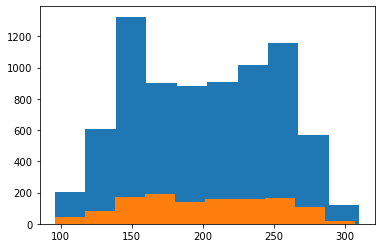

In [127]:
plt.hist(data_2); 
plt.hist(data_1); 

8. Рассчитайте следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    ● Доля сотрудников с повышением за последние 5 лет
    ● Средняя степень удовлетворенности
    ● Среднее количество проектов

In [130]:
df_left = df.loc[df['left'] == 1] # уволившиеся
df_work = df.loc[df['left'] == 0] # неуволившиеся

In [213]:
# Доля сотрудников с повышением за последние 5 лет
    # среди уволившихся
part_prom_left = df_left.loc[df_left['promotion_last_5years'] == 1].shape[0] / df_left.shape[0]
    # среди неуволившихся
part_prom_work = df_work.loc[df_work['promotion_last_5years'] == 1].shape[0] / df_work.shape[0]
print("Доля сотрудников с повышением за последние 5 лет среди уволившихся:", '%.2f' % part_prom_left)
print("Доля сотрудников с повышением за последние 5 лет среди неуволившихся:", '%.2f' % part_prom_work)

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.01
Доля сотрудников с повышением за последние 5 лет среди неуволившихся: 0.03


In [168]:
# Средняя степень удовлетворенности

print("Средняя степень удовлетворенности среди уволившихся:", '%.2f' % df_left['satisfaction_level'].mean())
print("Средняя степень удовлетворенности среди неуволившихся:", '%.2f' % df_work['satisfaction_level'].mean())


Средняя степень удовлетворенности среди уволившихся: 0.44
Средняя степень удовлетворенности среди неуволившихся: 0.67


In [169]:
# Среднее количество проектов
print("Среднее количество проектов среди уволившихся:", '%.2f' % df_left['number_project'].mean())
print("Среднее количество проектов среди неуволившихся:", '%.2f' % df_work['number_project'].mean())

Среднее количество проектов среди уволившихся: 3.86
Среднее количество проектов среди неуволившихся: 3.79


9. Разделите данные на тестовую и обучающую выборки. Постройте модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оцените качество модели на тестовой выборке.

In [191]:
factors = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
df_small = df[factors]
HR_variety = df['left']

In [192]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_small, HR_variety, test_size=0.25)

In [201]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [203]:
lda.coef_

array([[-4.59661945e+00,  7.39723047e-01, -2.21408394e-01,
         4.03424669e-03,  2.34502639e-01, -1.04686268e+00,
        -1.13153447e+00]])

In [204]:
# точность модели:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test)) 

0.7426666666666667

10. Загрузите jupyter notebook с решением на github и пришлите ссылку.